# EDA

## データメモ
### feature
- 店舗の特徴が格納されている
- 45店舗
- 各店舗週別
- 気温、ガソリン価格、Markdown変数5つ→プロモーション、CPI（消費者物価指数）、失業変数、休日があるか否か

### stores
- 45店舗別のタイプと面積

### train
- 各店舗ごと部門ごとの日別データと週単位の価格が記載
- 部門はおそらく取り扱いカテゴリーみたいな感じ？
- 期間：2010年2月5日〜2012年10月26日の143週間

### test
- 期間：2012年11月2日〜2013年7月26日



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
feature = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/features.csv.zip")
stores = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/stores.csv")
df_test = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/test.csv.zip")
df_train = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/train.csv.zip")
submit = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip")

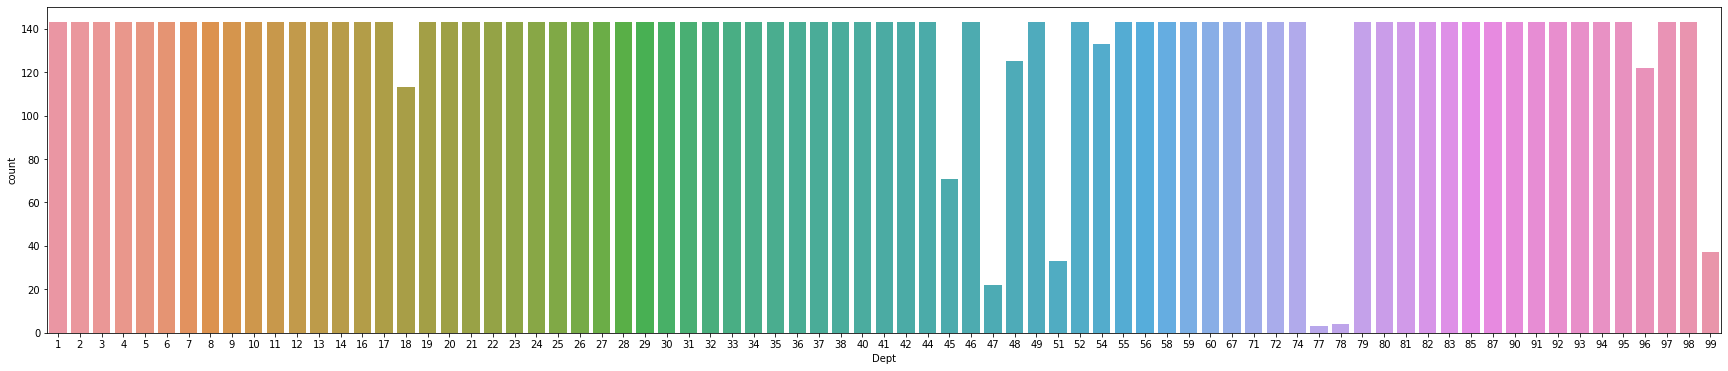

In [3]:
#店舗１の部門（カテゴリ）別のデータ数
plt.figure(figsize=(30,6))
sns.countplot(x="Dept", data=df_train[df_train["Store"] == 1])
plt.show()

- いくつかのカテゴリーで売れていない週がある

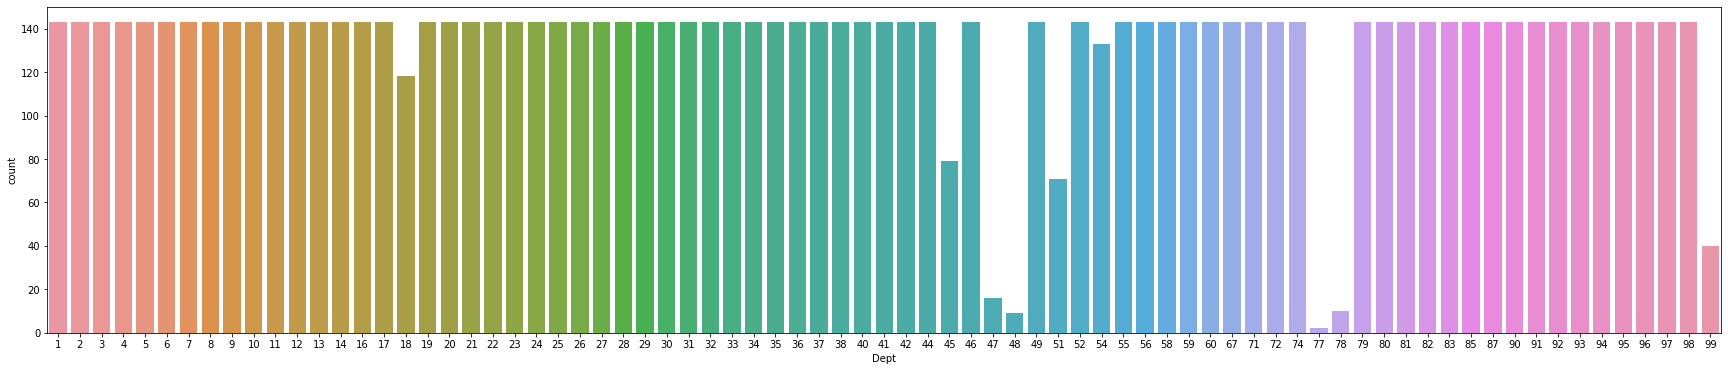

In [4]:
#他店舗の部門（カテゴリ）別のデータ数
plt.figure(figsize=(30,6))
sns.countplot(x="Dept", data=df_train[df_train["Store"] == 32])
plt.show()

- カテゴリのデータは他の店舗でも同じような傾向

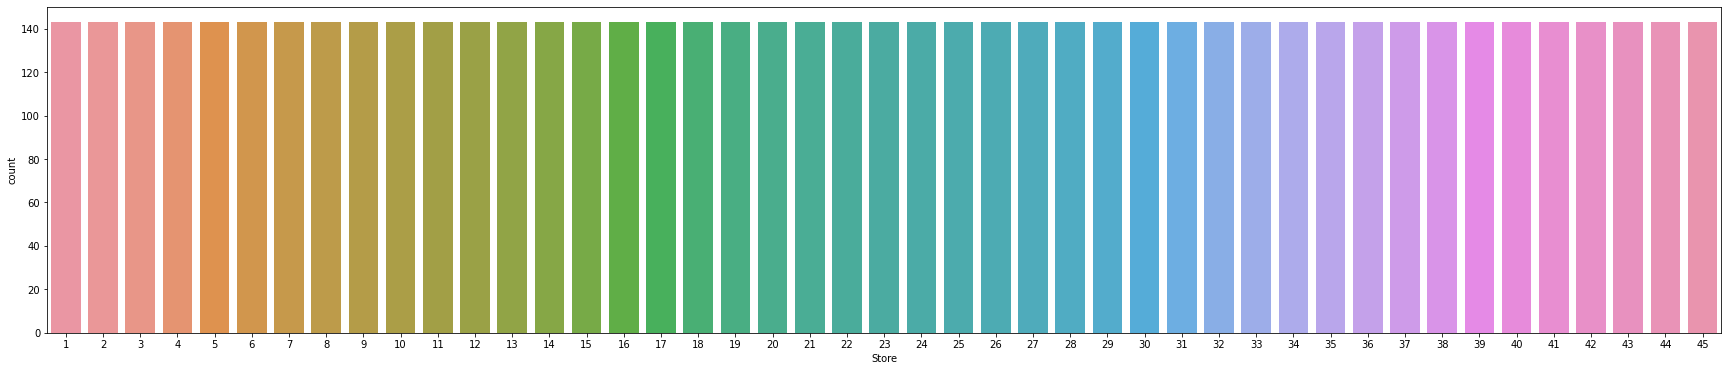

In [5]:
# カテゴリ1の店舗別のデータ数
plt.figure(figsize=(30,6))
sns.countplot(x="Store", data=df_train[df_train["Dept"] == 1])
plt.show()

- カテゴリ1は全ての店舗で143週間分存在

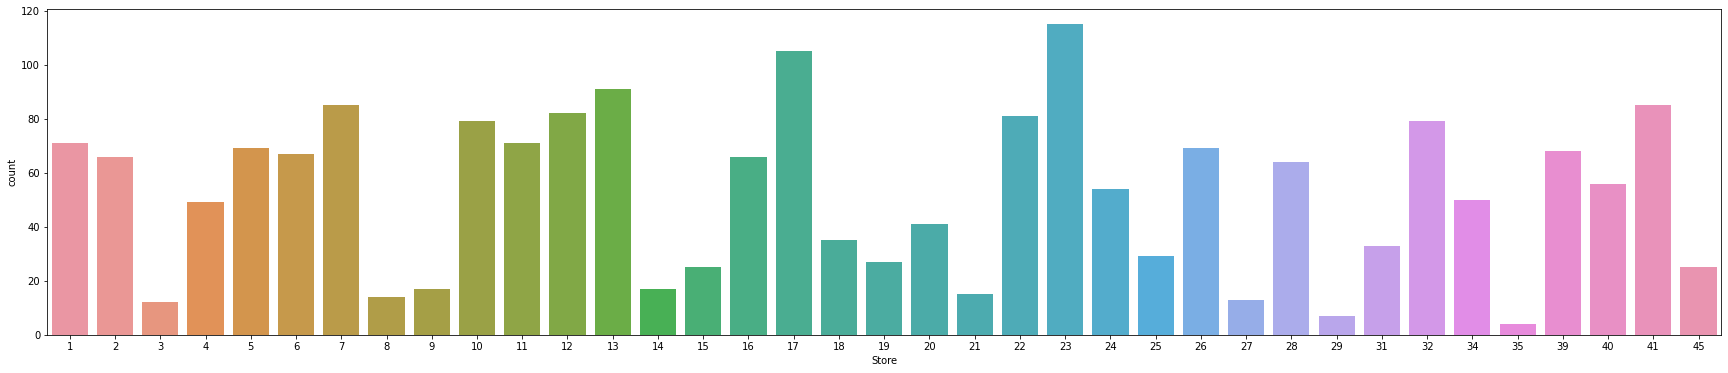

In [6]:
# カテゴリ45の店舗別のデータ数
plt.figure(figsize=(30,6))
sns.countplot(x="Store", data=df_train[df_train["Dept"] == 45])
plt.show()

- カテゴリによっては店舗別にデータ数にばらつきがある

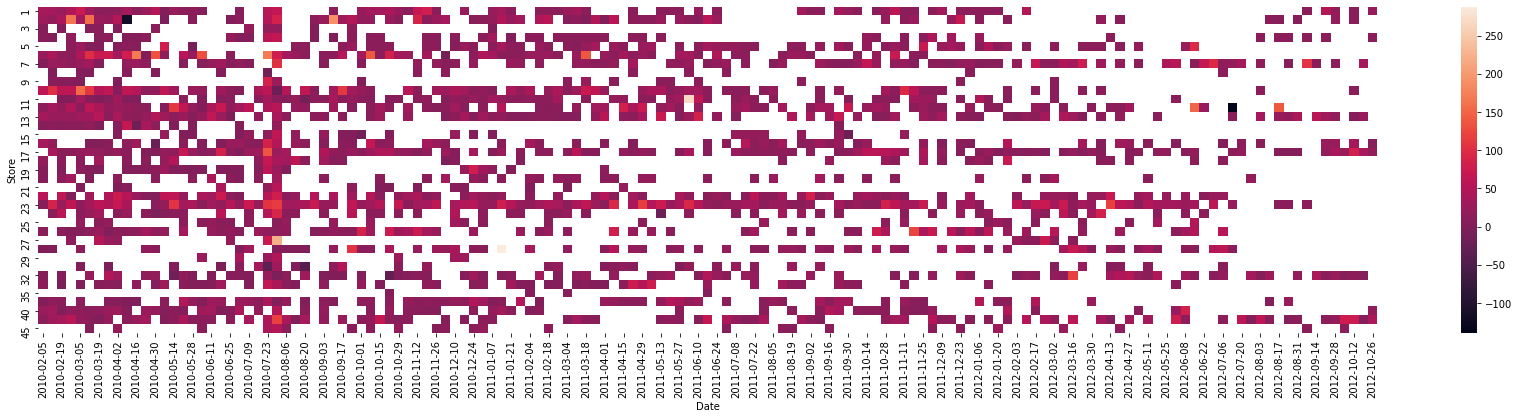

In [7]:
# カテゴリ45の売上データを店舗ごと日別に可視化
plt.figure(figsize=(30,6))
sns.heatmap(pd.pivot_table(df_train[df_train["Dept"] == 45], index="Store", columns="Date", values="Weekly_Sales" ))
plt.show()

- 売上がない週がいくつかあり、時を経るにつれてだんだんと売上が落ちてきている
- 売上が負の日がある→要対応

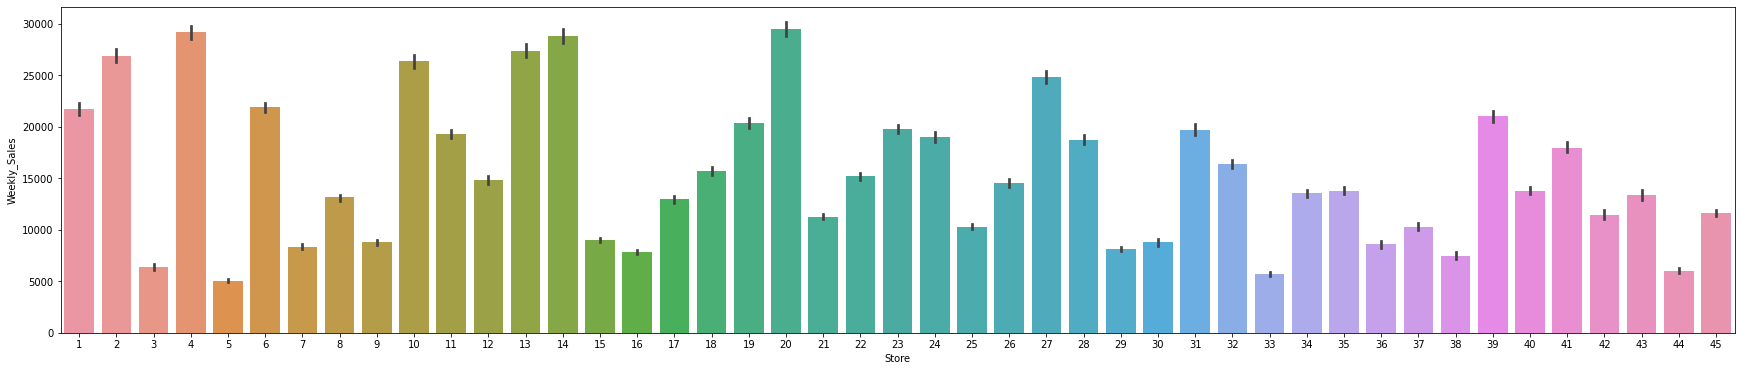

In [8]:
#店舗別の週売上の平均
plt.figure(figsize=(30,6))
sns.barplot(x="Store", y="Weekly_Sales", data=df_train)
plt.show()

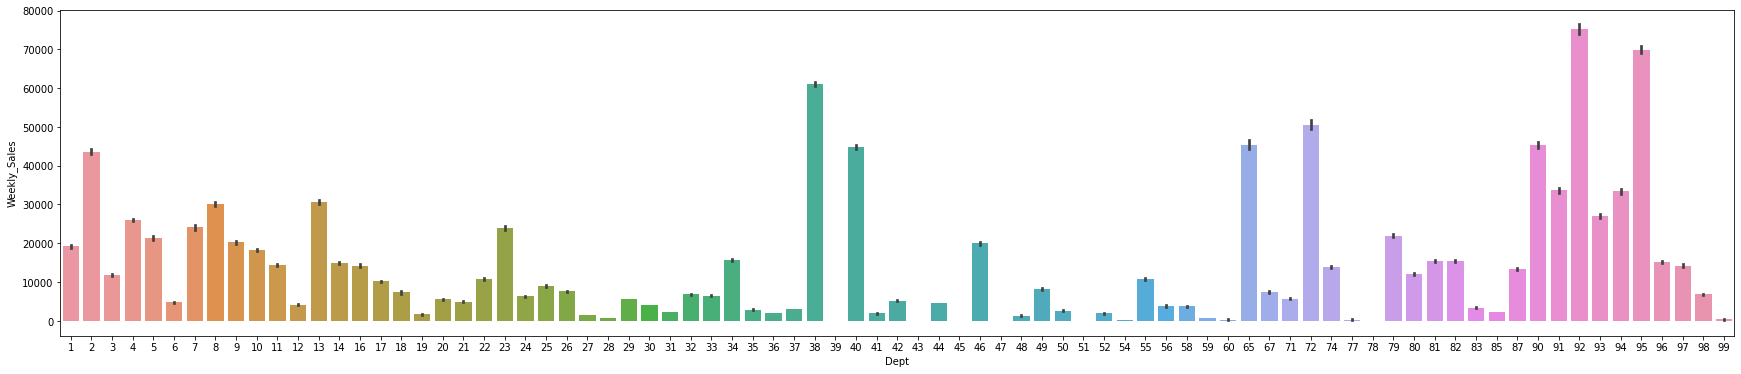

In [9]:
# カテゴリ別の週売上の平均
plt.figure(figsize=(30,6))
sns.barplot(x="Dept", y="Weekly_Sales", data=df_train)
plt.show()

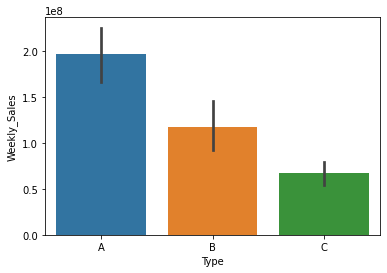

In [10]:
# 店舗タイプ別の売上
df_tmp = pd.merge(df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index(), stores)
sns.barplot(x="Type", y="Weekly_Sales", data=df_tmp)
plt.show()

- 店舗タイプ別に売上が大きく違うA>B>C

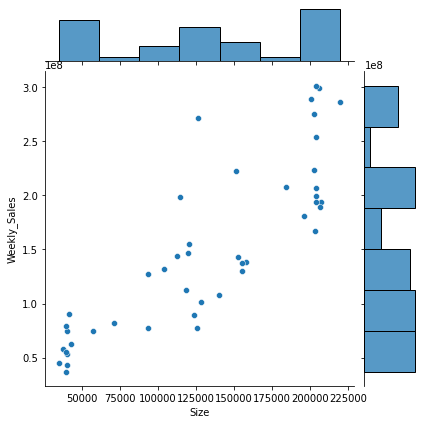

In [11]:
# 店舗サイズ別の売上
sns.jointplot(x="Size", y="Weekly_Sales", data=df_tmp)
plt.show()

In [12]:
df_tmp.corr()

,Store,Weekly_Sales,Size
Store,1.00000,-0.350100,-0.244270
Weekly_Sales,-0.35010,1.000000,0.846161
Size,-0.24427,0.846161,1.000000


- 店舗サイズと売上には強い相関がある

In [13]:
# Featureの特徴量について考察
df_tmp = pd.merge(df_train.groupby(["Store", "Date"]).sum()[["Weekly_Sales"]].reset_index(), feature)

In [14]:
# Featureの統計量を確認
df_tmp.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,2280.000000,1637.000000,2046.000000,1965.000000,2295.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,60.663782,3.358607,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240,171.578394,7.999151
std,12.988182,5.643666e+05,18.444933,0.459020,8183.310015,9268.082387,9287.242800,6211.203947,5868.933325,39.356712,1.875885
min,1.000000,2.099863e+05,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,12.000000,5.533501e+05,47.460000,2.933000,1679.190000,37.200000,4.700000,483.270000,1702.565000,131.735000,6.891000
50%,23.000000,9.607460e+05,62.670000,3.445000,4972.590000,187.040000,22.700000,1419.420000,3186.520000,182.616521,7.874000
75%,34.000000,1.420159e+06,74.940000,3.735000,8873.582500,1785.290000,99.987500,3496.080000,5422.080000,212.743293,8.622000
max,45.000000,3.818686e+06,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


- Markdownのプロモーション変数はデータ数がまばら

In [15]:
# Feature変数の相関係数を確認
df_tmp.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Store,1.000000e+00,-0.335332,-0.022659,0.060023,-0.155432,-0.041156,-0.036305,-0.015094,-0.052955,-0.209492,0.223531,-4.386841e-16
Weekly_Sales,-3.353320e-01,1.000000,-0.063810,0.009464,0.319770,0.095676,0.194000,0.162617,0.305563,-0.072634,-0.106176,3.689097e-02
Temperature,-2.265908e-02,-0.063810,1.000000,0.144982,-0.060608,-0.323216,-0.097206,-0.068174,-0.029419,0.176888,0.101158,-1.550913e-01
Fuel_Price,6.002295e-02,0.009464,0.144982,1.000000,0.059594,-0.215986,-0.098473,-0.043521,-0.121804,-0.170642,-0.034684,-7.834652e-02
MarkDown1,-1.554324e-01,0.319770,-0.060608,0.059594,1.000000,0.031405,-0.100608,0.819523,0.177352,-0.058339,0.041885,-3.229895e-02
MarkDown2,-4.115574e-02,0.095676,-0.323216,-0.215986,0.031405,1.000000,-0.048319,-0.005984,-0.002166,-0.040486,0.020249,3.286084e-01
MarkDown3,-3.630451e-02,0.194000,-0.097206,-0.098473,-0.100608,-0.048319,1.000000,-0.069264,-0.021953,-0.023280,0.011437,4.179585e-01
MarkDown4,-1.509412e-02,0.162617,-0.068174,-0.043521,0.819523,-0.005984,-0.069264,1.000000,0.111325,-0.051851,0.024568,-1.947300e-03
MarkDown5,-5.295491e-02,0.305563,-0.029419,-0.121804,0.177352,-0.002166,-0.021953,0.111325,1.000000,0.056756,-0.007703,-5.151463e-02
CPI,-2.094919e-01,-0.072634,0.176888,-0.170642,-0.058339,-0.040486,-0.023280,-0.051851,0.056756,1.000000,-0.302020,-2.162091e-03


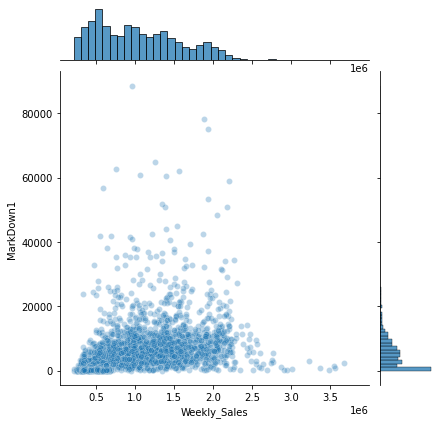

In [16]:
# 散布図を確認
sns.jointplot(x="Weekly_Sales", y="MarkDown1", data=df_tmp, alpha=0.3)
plt.show()

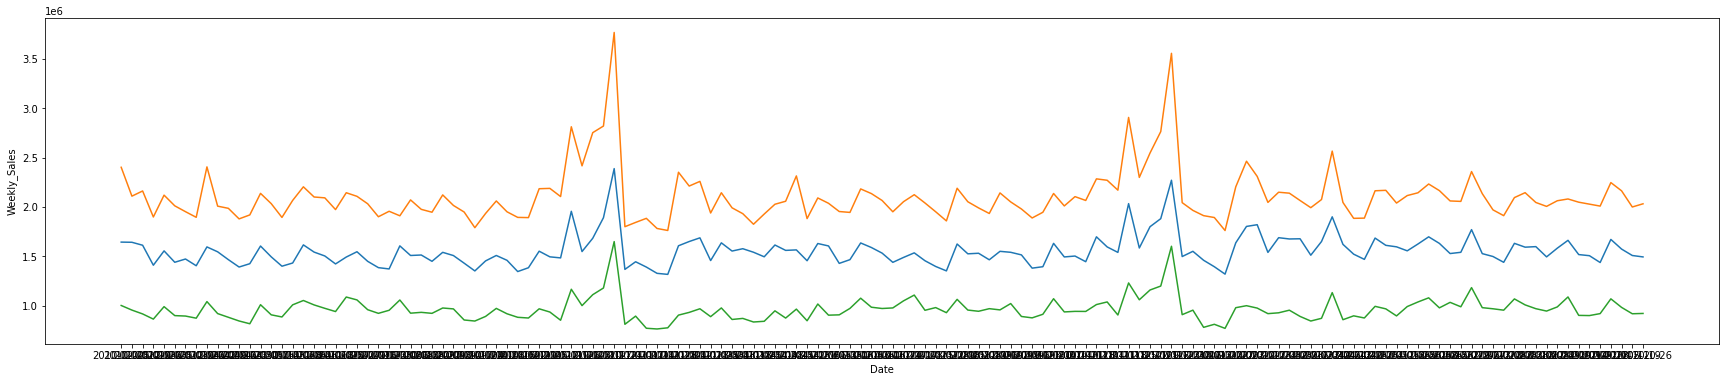

In [17]:
# 週別の売上推移を確認
df_tmp = pd.merge(df_train.groupby(["Store", "Date"]).sum()[["Weekly_Sales"]].reset_index(), feature)
plt.figure(figsize=(30,6))
sns.lineplot(x="Date", y="Weekly_Sales", data=df_tmp[df_tmp["Store"] == 1])
sns.lineplot(x="Date", y="Weekly_Sales", data=df_tmp[df_tmp["Store"] == 20])
sns.lineplot(x="Date", y="Weekly_Sales", data=df_tmp[df_tmp["Store"] == 40])
plt.show()

- 特定期間のスパイクは店舗別に見ても共通していそう

In [18]:
# 売上の高い週順に並べる
df_tmp[df_tmp["Store"] == 1].sort_values("Weekly_Sales", ascending=False).head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
46,1,2010-12-24,2387950.20,52.33,2.886,NaN,NaN,NaN,NaN,NaN,211.405122,7.838,False
98,1,2011-12-23,2270188.99,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,219.357722,7.866,False
94,1,2011-11-25,2033320.66,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
42,1,2010-11-26,1955624.11,64.52,2.735,NaN,NaN,NaN,NaN,NaN,211.748433,7.838,True
113,1,2012-04-06,1899676.88,70.43,3.891,10121.97,NaN,77.98,3750.59,4510.72,221.435611,7.143,False
45,1,2010-12-17,1891034.93,49.84,2.869,NaN,NaN,NaN,NaN,NaN,211.405312,7.838,False
97,1,2011-12-16,1881176.67,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,False
106,1,2012-02-17,1819870.00,45.32,3.510,9873.33,11062.27,9.80,8409.31,3402.66,220.425759,7.348,False
105,1,2012-02-10,1802477.43,48.02,3.409,13925.06,6927.23,101.64,8471.88,6886.04,220.265178,7.348,True
96,1,2011-12-09,1799682.38,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False


- 年末商戦からか11月、12月は伸びる傾向にありそう
- 特にその中でも月末が伸びる傾向にありそう→クーポンとかセールを月末にやる？

# 初期モデル構築
### 手法：LightGBM
### 前処理方針：
- 売上が負の場合は0に補正
- 月データを作成
- 上旬・中旬・下旬データを作成

### パラメータチューニング
- Optunaを利用

In [19]:
import optuna.integration.lightgbm as lgb_tune
import lightgbm as lgb


#各データをマージし学習データを作成
df = pd.merge(pd.merge(df_train, stores), feature)

#売上が負だったら0にする
df.loc[df['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0

#月の中で上旬・中旬・下旬を分ける
def term_class(x):
    if int(x[8:10]) < 10:
        term = 1
    elif int(x[8:10]) < 20:
        term = 2
    else:
        term = 3
    return term

#前処理
def preprocess(df):

    #月データ
    df["month"] = df["Date"].apply(lambda x: x[5:7])

    #月の中で上旬・中旬・下旬を分ける
    df["term"] = df["Date"].apply(term_class)
    
    #LightGBM用にカテゴリ化
    for col in ["Type", "Store", "Dept", "month", "term"]:
        df[col] = df[col].astype("category")
        
    return df
        

In [20]:
##パラメータ最適化##

df = preprocess(df)

# 学習データと検証データに分類する
df_val = df[df["Date"] >= "2012-07-13"]
df_tr = df[df["Date"] < "2012-07-13"]

df_tr_x = df_tr.drop(["Weekly_Sales", "Date"], axis=1)
df_val_x = df_val.drop(["Weekly_Sales", "Date"], axis=1)
df_tr_y = df_tr["Weekly_Sales"]
df_val_y = df_val["Weekly_Sales"]


trains = lgb.Dataset(df_tr_x, df_tr_y)
valids = lgb.Dataset(df_val_x, df_val_y)

params = {
    'objective': 'regression',
    'metric': 'mae'
}

model_tune = lgb_tune.train(
    params, trains, valid_sets=valids, 
    verbose_eval=100, 
    early_stopping_rounds=100,
)


[I 2021-04-27 03:00:48,648] A new study created in memory with name: no-name-0f707a71-0245-460a-ae44-d6982c45ac84
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[100]	valid_0's l1: 2722.78
[200]	valid_0's l1: 2283.97
[300]	valid_0's l1: 2076.13
[400]	valid_0's l1: 1956.2
[500]	valid_0's l1: 1887.14
[600]	valid_0's l1: 1813.8
[700]	valid_0's l1: 1769.34
[800]	valid_0's l1: 1742.73
[900]	valid_0's l1: 1723.78


feature_fraction, val_score: 1701.566402:  14%|#4        | 1/7 [00:12<01:14, 12.40s/it]

[1000]	valid_0's l1: 1701.57
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1701.57
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 3502.36
[200]	valid_0's l1: 3029.55
[300]	valid_0's l1: 2781.5
[400]	valid_0's l1: 2577.27
[500]	valid_0's l1: 2437.66
[600]	valid_0's l1: 2338.08
[700]	valid_0's l1: 2251.73
[800]	valid_0's l1: 2204.78
[900]	valid_0's l1: 2184.61


feature_fraction, val_score: 1701.566402:  29%|##8       | 2/7 [00:28<01:11, 14.32s/it]

[1000]	valid_0's l1: 2142.24
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 2142.24
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 3173.45
[200]	valid_0's l1: 2779.12
[300]	valid_0's l1: 2514.63
[400]	valid_0's l1: 2327.63
[500]	valid_0's l1: 2201.58
[600]	valid_0's l1: 2123.71
[700]	valid_0's l1: 2087.74
[800]	valid_0's l1: 2041.7
[900]	valid_0's l1: 1995.05


feature_fraction, val_score: 1701.566402:  43%|####2     | 3/7 [00:43<00:59, 14.88s/it]

[1000]	valid_0's l1: 1944.7
Did not meet early stopping. Best iteration is:
[998]	valid_0's l1: 1944.61
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2920.98
[200]	valid_0's l1: 2492.58
[300]	valid_0's l1: 2279.68
[400]	valid_0's l1: 2123.39
[500]	valid_0's l1: 2022.22
[600]	valid_0's l1: 1961.09
[700]	valid_0's l1: 1921.35
[800]	valid_0's l1: 1888.98
[900]	valid_0's l1: 1854.88


feature_fraction, val_score: 1701.566402:  57%|#####7    | 4/7 [00:58<00:45, 15.04s/it]

[1000]	valid_0's l1: 1821.64
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1821.64
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2786.92
[200]	valid_0's l1: 2431.39
[300]	valid_0's l1: 2154.57
[400]	valid_0's l1: 2015.89
[500]	valid_0's l1: 1931.01
[600]	valid_0's l1: 1882.6
[700]	valid_0's l1: 1839.53
[800]	valid_0's l1: 1810.49
[900]	valid_0's l1: 1783.07


feature_fraction, val_score: 1701.566402:  71%|#######1  | 5/7 [01:12<00:28, 14.44s/it]

[1000]	valid_0's l1: 1759.01
Did not meet early stopping. Best iteration is:
[999]	valid_0's l1: 1758.98
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2709.39
[200]	valid_0's l1: 2261.22
[300]	valid_0's l1: 2059.44
[400]	valid_0's l1: 1929.11
[500]	valid_0's l1: 1848.17
[600]	valid_0's l1: 1809.23
[700]	valid_0's l1: 1772.51
[800]	valid_0's l1: 1750.99
[900]	valid_0's l1: 1723.41


feature_fraction, val_score: 1701.566402:  86%|########5 | 6/7 [01:25<00:14, 14.15s/it]

[1000]	valid_0's l1: 1707.79
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1707.79
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2848.46
[200]	valid_0's l1: 2350.41
[300]	valid_0's l1: 2112.3
[400]	valid_0's l1: 1972.96
[500]	valid_0's l1: 1894.59
[600]	valid_0's l1: 1840.68
[700]	valid_0's l1: 1801.99
[800]	valid_0's l1: 1778.33
[900]	valid_0's l1: 1758.5


num_leaves, val_score: 1701.566402:   0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_0's l1: 1737.99
Did not meet early stopping. Best iteration is:
[999]	valid_0's l1: 1737.92
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2226.59
[200]	valid_0's l1: 1901.65
[300]	valid_0's l1: 1780.51
[400]	valid_0's l1: 1709.73
[500]	valid_0's l1: 1670.03
[600]	valid_0's l1: 1646.03
[700]	valid_0's l1: 1626.25
[800]	valid_0's l1: 1613.28
[900]	valid_0's l1: 1603.74
[1000]	valid_0's l1: 1595.73
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1595.73


num_leaves, val_score: 1595.733969:   5%|5         | 1/20 [00:15<05:01, 15.86s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1768.25
[200]	valid_0's l1: 1615.53
[300]	valid_0's l1: 1578.5
[400]	valid_0's l1: 1558.36
[500]	valid_0's l1: 1545.54
[600]	valid_0's l1: 1538.05
[700]	valid_0's l1: 1532.18
[800]	valid_0's l1: 1527.94
[900]	valid_0's l1: 1525.41
[1000]	valid_0's l1: 1524.72
Did not meet early stopping. Best iteration is:
[955]	valid_0's l1: 1524.39


num_leaves, val_score: 1524.388656:  10%|#         | 2/20 [00:44<07:02, 23.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2108.89
[200]	valid_0's l1: 1823.86
[300]	valid_0's l1: 1736.17
[400]	valid_0's l1: 1687.83
[500]	valid_0's l1: 1661.74
[600]	valid_0's l1: 1633.85
[700]	valid_0's l1: 1620.14
[800]	valid_0's l1: 1604.5
[900]	valid_0's l1: 1596.88
[1000]	valid_0's l1: 1588.89
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1588.89


num_leaves, val_score: 1524.388656:  15%|#5        | 3/20 [01:02<05:56, 20.99s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2418.36
[200]	valid_0's l1: 2044.3
[300]	valid_0's l1: 1888.35
[400]	valid_0's l1: 1794.52
[500]	valid_0's l1: 1741.38
[600]	valid_0's l1: 1709.32
[700]	valid_0's l1: 1680.77
[800]	valid_0's l1: 1657.93
[900]	valid_0's l1: 1643.46
[1000]	valid_0's l1: 1628.32
Did not meet early stopping. Best iteration is:
[998]	valid_0's l1: 1628.21


num_leaves, val_score: 1524.388656:  20%|##        | 4/20 [01:16<04:51, 18.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 7584.67


num_leaves, val_score: 1524.388656:  25%|##5       | 5/20 [01:18<03:05, 12.36s/it]

Early stopping, best iteration is:
[66]	valid_0's l1: 7522.51
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1816.04
[200]	valid_0's l1: 1654.44
[300]	valid_0's l1: 1604.38
[400]	valid_0's l1: 1575.93
[500]	valid_0's l1: 1562.39
[600]	valid_0's l1: 1554.11
[700]	valid_0's l1: 1549.18
[800]	valid_0's l1: 1545.86
[900]	valid_0's l1: 1541.29
[1000]	valid_0's l1: 1538.25
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1538.25


num_leaves, val_score: 1524.388656:  30%|###       | 6/20 [01:45<04:03, 17.39s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2423.46
[200]	valid_0's l1: 2046.7
[300]	valid_0's l1: 1894.67
[400]	valid_0's l1: 1807.47
[500]	valid_0's l1: 1752.89
[600]	valid_0's l1: 1712.25
[700]	valid_0's l1: 1685.06
[800]	valid_0's l1: 1660.36
[900]	valid_0's l1: 1645.56
[1000]	valid_0's l1: 1638.04
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1638.04


num_leaves, val_score: 1524.388656:  35%|###5      | 7/20 [02:00<03:33, 16.46s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 3152.79
[200]	valid_0's l1: 2663.83


num_leaves, val_score: 1524.388656:  55%|#####5    | 11/20 [03:21<03:10, 21.17s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1784.58
[200]	valid_0's l1: 1626.39
[300]	valid_0's l1: 1588.54
[400]	valid_0's l1: 1570.3
[500]	valid_0's l1: 1560.13
[600]	valid_0's l1: 1555.02
[700]	valid_0's l1: 1551.08
[800]	valid_0's l1: 1547.61
[900]	valid_0's l1: 1542.86
[1000]	valid_0's l1: 1540.29
Did not meet early stopping. Best iteration is:
[994]	valid_0's l1: 1540.07


num_leaves, val_score: 1524.388656:  60%|######    | 12/20 [03:51<03:09, 23.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1757.41
[200]	valid_0's l1: 1620.37
[300]	valid_0's l1: 1577.57
[400]	valid_0's l1: 1558.68
[500]	valid_0's l1: 1546.53
[600]	valid_0's l1: 1540.94
[700]	valid_0's l1: 1533.92
[800]	valid_0's l1: 1528.78
[900]	valid_0's l1: 1525.97
[1000]	valid_0's l1: 1525.1
Did not meet early stopping. Best iteration is:
[981]	valid_0's l1: 1525.03


num_leaves, val_score: 1524.388656:  65%|######5   | 13/20 [04:21<02:58, 25.53s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1880.62
[200]	valid_0's l1: 1686.4
[300]	valid_0's l1: 1616.8
[400]	valid_0's l1: 1587.82
[500]	valid_0's l1: 1575.2
[600]	valid_0's l1: 1563.32
[700]	valid_0's l1: 1553.09
[800]	valid_0's l1: 1543.09
[900]	valid_0's l1: 1538.91
[1000]	valid_0's l1: 1536.21
Did not meet early stopping. Best iteration is:
[990]	valid_0's l1: 1536.19


num_leaves, val_score: 1524.388656:  70%|#######   | 14/20 [04:44<02:30, 25.01s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1786.49
[200]	valid_0's l1: 1632.31
[300]	valid_0's l1: 1581.45
[400]	valid_0's l1: 1558.9
[500]	valid_0's l1: 1545.88
[600]	valid_0's l1: 1538.45
[700]	valid_0's l1: 1531.54
[800]	valid_0's l1: 1525.99
[900]	valid_0's l1: 1521.81
[1000]	valid_0's l1: 1518.1
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1518.1


num_leaves, val_score: 1518.099568:  75%|#######5  | 15/20 [05:10<02:06, 25.28s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1802.88
[200]	valid_0's l1: 1648.4
[300]	valid_0's l1: 1595.5
[400]	valid_0's l1: 1576.15
[500]	valid_0's l1: 1566.73
[600]	valid_0's l1: 1558.49
[700]	valid_0's l1: 1552.47
[800]	valid_0's l1: 1548.17
[900]	valid_0's l1: 1544.35
[1000]	valid_0's l1: 1541.52
Did not meet early stopping. Best iteration is:
[983]	valid_0's l1: 1541.25


num_leaves, val_score: 1518.099568:  80%|########  | 16/20 [05:37<01:43, 25.79s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1913.54
[200]	valid_0's l1: 1710.47
[300]	valid_0's l1: 1650.98
[400]	valid_0's l1: 1616.24
[500]	valid_0's l1: 1592.34
[600]	valid_0's l1: 1578.34
[700]	valid_0's l1: 1570.1
[800]	valid_0's l1: 1563.31
[900]	valid_0's l1: 1558.17
[1000]	valid_0's l1: 1555.81
Did not meet early stopping. Best iteration is:
[987]	valid_0's l1: 1555.33


num_leaves, val_score: 1518.099568:  85%|########5 | 17/20 [05:59<01:13, 24.60s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1815.21
[200]	valid_0's l1: 1660.67
[300]	valid_0's l1: 1616.88
[400]	valid_0's l1: 1594.77
[500]	valid_0's l1: 1582.92
[600]	valid_0's l1: 1571.47
[700]	valid_0's l1: 1561.32
[800]	valid_0's l1: 1555.99
[900]	valid_0's l1: 1551.44
[1000]	valid_0's l1: 1549.11
Did not meet early stopping. Best iteration is:
[975]	valid_0's l1: 1548.27


num_leaves, val_score: 1518.099568:  90%|######### | 18/20 [06:25<00:49, 24.85s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.24
[200]	valid_0's l1: 1620.21
[300]	valid_0's l1: 1573.96
[400]	valid_0's l1: 1547.97
[500]	valid_0's l1: 1535.56
[600]	valid_0's l1: 1530.2
[700]	valid_0's l1: 1520.06
[800]	valid_0's l1: 1516.62
[900]	valid_0's l1: 1514.42
[1000]	valid_0's l1: 1513.41
Did not meet early stopping. Best iteration is:
[968]	valid_0's l1: 1513.09


num_leaves, val_score: 1513.085711:  95%|#########5| 19/20 [06:52<00:25, 25.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1837.82
[200]	valid_0's l1: 1673.82
[300]	valid_0's l1: 1617.49
[400]	valid_0's l1: 1591
[500]	valid_0's l1: 1576.5
[600]	valid_0's l1: 1565.86
[700]	valid_0's l1: 1562.47
[800]	valid_0's l1: 1555.03
[900]	valid_0's l1: 1550.07
[1000]	valid_0's l1: 1548.26
Did not meet early stopping. Best iteration is:
[991]	valid_0's l1: 1548.25


bagging, val_score: 1513.085711:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1846.54
[200]	valid_0's l1: 1698.89
[300]	valid_0's l1: 1657.83
[400]	valid_0's l1: 1643.59
[500]	valid_0's l1: 1640.69
[600]	valid_0's l1: 1637.06
[700]	valid_0's l1: 1636.15
[800]	valid_0's l1: 1635.93
Early stopping, best iteration is:
[745]	valid_0's l1: 1633.92


bagging, val_score: 1513.085711:  10%|#         | 1/10 [00:33<05:03, 33.69s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1805.83
[200]	valid_0's l1: 1635.2
[300]	valid_0's l1: 1597.8
[400]	valid_0's l1: 1576.23
[500]	valid_0's l1: 1569.93
[600]	valid_0's l1: 1563.91
[700]	valid_0's l1: 1557.65
[800]	valid_0's l1: 1552.96
[900]	valid_0's l1: 1552.22
[1000]	valid_0's l1: 1551.44
Did not meet early stopping. Best iteration is:
[986]	valid_0's l1: 1550.34


bagging, val_score: 1513.085711:  20%|##        | 2/10 [01:16<05:11, 38.88s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1824.16
[200]	valid_0's l1: 1645.62
[300]	valid_0's l1: 1602.26
[400]	valid_0's l1: 1582.83
[500]	valid_0's l1: 1574.9
[600]	valid_0's l1: 1568.65
[700]	valid_0's l1: 1564.02
[800]	valid_0's l1: 1561.74
[900]	valid_0's l1: 1559.09
[1000]	valid_0's l1: 1556.07
Did not meet early stopping. Best iteration is:
[975]	valid_0's l1: 1555.65


bagging, val_score: 1513.085711:  30%|###       | 3/10 [01:55<04:34, 39.28s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1839.74
[200]	valid_0's l1: 1685.88
[300]	valid_0's l1: 1651.2
[400]	valid_0's l1: 1633.52
[500]	valid_0's l1: 1625.69
[600]	valid_0's l1: 1625.51
[700]	valid_0's l1: 1624.77
[800]	valid_0's l1: 1622.81
[900]	valid_0's l1: 1616.72
[1000]	valid_0's l1: 1616.25
Did not meet early stopping. Best iteration is:
[909]	valid_0's l1: 1615.52


bagging, val_score: 1513.085711:  40%|####      | 4/10 [02:35<03:56, 39.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1804.4
[200]	valid_0's l1: 1633.18
[300]	valid_0's l1: 1593.88
[400]	valid_0's l1: 1574.28
[500]	valid_0's l1: 1564.42
[600]	valid_0's l1: 1560.53
[700]	valid_0's l1: 1557.06
[800]	valid_0's l1: 1552.97
[900]	valid_0's l1: 1549.75
[1000]	valid_0's l1: 1546.51
Did not meet early stopping. Best iteration is:
[974]	valid_0's l1: 1546.09


bagging, val_score: 1513.085711:  50%|#####     | 5/10 [03:14<03:16, 39.31s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1823.55
[200]	valid_0's l1: 1671.08
[300]	valid_0's l1: 1630.74
[400]	valid_0's l1: 1615.73
[500]	valid_0's l1: 1607.7
[600]	valid_0's l1: 1605.23
[700]	valid_0's l1: 1604.01
[800]	valid_0's l1: 1601.3
[900]	valid_0's l1: 1599.95
Early stopping, best iteration is:
[834]	valid_0's l1: 1599.09


bagging, val_score: 1513.085711:  60%|######    | 6/10 [03:51<02:33, 38.32s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1792.33
[200]	valid_0's l1: 1637.83
[300]	valid_0's l1: 1596.31
[400]	valid_0's l1: 1577.84
[500]	valid_0's l1: 1566.33
[600]	valid_0's l1: 1561.17
[700]	valid_0's l1: 1557.9
[800]	valid_0's l1: 1553.6
[900]	valid_0's l1: 1552.57
Early stopping, best iteration is:
[854]	valid_0's l1: 1551.05


bagging, val_score: 1513.085711:  70%|#######   | 7/10 [04:28<01:54, 38.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1820.54
[200]	valid_0's l1: 1665.98
[300]	valid_0's l1: 1632.42
[400]	valid_0's l1: 1620.14
[500]	valid_0's l1: 1616.55
[600]	valid_0's l1: 1617.43
[700]	valid_0's l1: 1611.97
[800]	valid_0's l1: 1609.99
[900]	valid_0's l1: 1610.88
Early stopping, best iteration is:
[810]	valid_0's l1: 1608.62


bagging, val_score: 1513.085711:  80%|########  | 8/10 [05:04<01:14, 37.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1820.3
[200]	valid_0's l1: 1681.53
[300]	valid_0's l1: 1643.11
[400]	valid_0's l1: 1622.57
[500]	valid_0's l1: 1613.28
[600]	valid_0's l1: 1609.32
[700]	valid_0's l1: 1607.63
[800]	valid_0's l1: 1604.32
[900]	valid_0's l1: 1597.48
[1000]	valid_0's l1: 1596.25
Did not meet early stopping. Best iteration is:
[978]	valid_0's l1: 1596.17


bagging, val_score: 1513.085711:  90%|######### | 9/10 [05:44<00:38, 38.20s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1797.49
[200]	valid_0's l1: 1655.7
[300]	valid_0's l1: 1622.31
[400]	valid_0's l1: 1606.06
[500]	valid_0's l1: 1598.79
[600]	valid_0's l1: 1592.25
[700]	valid_0's l1: 1586.37
[800]	valid_0's l1: 1584.36
[900]	valid_0's l1: 1582.13
[1000]	valid_0's l1: 1580.3
Did not meet early stopping. Best iteration is:
[993]	valid_0's l1: 1579.41


bagging, val_score: 1513.085711: 100%|##########| 10/10 [06:27<00:00, 38.72s/it]
feature_fraction_stage2, val_score: 1513.085711:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1801.13
[200]	valid_0's l1: 1650.44
[300]	valid_0's l1: 1604.98
[400]	valid_0's l1: 1584.32
[500]	valid_0's l1: 1569.1
[600]	valid_0's l1: 1557.17
[700]	valid_0's l1: 1550.17
[800]	valid_0's l1: 1547.18
[900]	valid_0's l1: 1541.94
[1000]	valid_0's l1: 1536.39
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1536.39


feature_fraction_stage2, val_score: 1513.085711:  33%|###3      | 1/3 [00:28<00:56, 28.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.24
[200]	valid_0's l1: 1620.21
[300]	valid_0's l1: 1573.96
[400]	valid_0's l1: 1547.97
[500]	valid_0's l1: 1535.56
[600]	valid_0's l1: 1530.2
[700]	valid_0's l1: 1520.06
[800]	valid_0's l1: 1516.62
[900]	valid_0's l1: 1514.42
[1000]	valid_0's l1: 1513.41
Did not meet early stopping. Best iteration is:
[968]	valid_0's l1: 1513.09


feature_fraction_stage2, val_score: 1513.085711:  67%|######6   | 2/3 [00:56<00:28, 28.13s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1801.13
[200]	valid_0's l1: 1650.44
[300]	valid_0's l1: 1604.98
[400]	valid_0's l1: 1584.33
[500]	valid_0's l1: 1569.1
[600]	valid_0's l1: 1557.16
[700]	valid_0's l1: 1550.13
[800]	valid_0's l1: 1547.16
[900]	valid_0's l1: 1541.96
[1000]	valid_0's l1: 1536.4
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1536.4


regularization_factors, val_score: 1513.085711:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1795.23
[200]	valid_0's l1: 1638.57
[300]	valid_0's l1: 1589.48
[400]	valid_0's l1: 1565.43
[500]	valid_0's l1: 1553.29
[600]	valid_0's l1: 1544.79
[700]	valid_0's l1: 1535.43
[800]	valid_0's l1: 1530.25
[900]	valid_0's l1: 1525.89
[1000]	valid_0's l1: 1524.07
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1524.07


regularization_factors, val_score: 1513.085711:   5%|5         | 1/20 [00:29<09:26, 29.80s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.16
[300]	valid_0's l1: 1573.99
[400]	valid_0's l1: 1547.86
[500]	valid_0's l1: 1537.58
[600]	valid_0's l1: 1528.85
[700]	valid_0's l1: 1521.15
[800]	valid_0's l1: 1516.39
[900]	valid_0's l1: 1514.2
[1000]	valid_0's l1: 1511.15
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1511.15


regularization_factors, val_score: 1511.150719:  10%|#         | 2/20 [00:59<08:55, 29.76s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.19
[300]	valid_0's l1: 1573.97
[400]	valid_0's l1: 1550.33
[500]	valid_0's l1: 1534.17
[600]	valid_0's l1: 1527.16
[700]	valid_0's l1: 1521.32
[800]	valid_0's l1: 1519.24
[900]	valid_0's l1: 1516.41
[1000]	valid_0's l1: 1514.74
Did not meet early stopping. Best iteration is:
[995]	valid_0's l1: 1514.65


regularization_factors, val_score: 1511.150719:  15%|#5        | 3/20 [01:29<08:24, 29.67s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.15
[300]	valid_0's l1: 1573.93
[400]	valid_0's l1: 1547.97
[500]	valid_0's l1: 1535.58
[600]	valid_0's l1: 1530.24
[700]	valid_0's l1: 1520.09
[800]	valid_0's l1: 1516.65
[900]	valid_0's l1: 1514.43
[1000]	valid_0's l1: 1513.42
Did not meet early stopping. Best iteration is:
[968]	valid_0's l1: 1513.1


regularization_factors, val_score: 1511.150719:  20%|##        | 4/20 [01:57<07:49, 29.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1786.02
[200]	valid_0's l1: 1622.95
[300]	valid_0's l1: 1574.75
[400]	valid_0's l1: 1555.51
[500]	valid_0's l1: 1546.36
[600]	valid_0's l1: 1538.62
[700]	valid_0's l1: 1531.4
[800]	valid_0's l1: 1527.72
[900]	valid_0's l1: 1522.87
[1000]	valid_0's l1: 1519.03
Did not meet early stopping. Best iteration is:
[992]	valid_0's l1: 1518.88


regularization_factors, val_score: 1511.150719:  25%|##5       | 5/20 [02:27<07:18, 29.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1771.03
[200]	valid_0's l1: 1623.58
[300]	valid_0's l1: 1570.76
[400]	valid_0's l1: 1556.35
[500]	valid_0's l1: 1539.8
[600]	valid_0's l1: 1532.25
[700]	valid_0's l1: 1526.54
[800]	valid_0's l1: 1519.32
[900]	valid_0's l1: 1520.11
Early stopping, best iteration is:
[822]	valid_0's l1: 1518.04


regularization_factors, val_score: 1511.150719:  30%|###       | 6/20 [02:54<06:42, 28.78s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.1
[300]	valid_0's l1: 1573.88
[400]	valid_0's l1: 1548.93
[500]	valid_0's l1: 1533.48
[600]	valid_0's l1: 1522.33
[700]	valid_0's l1: 1519.15
[800]	valid_0's l1: 1516.99
[900]	valid_0's l1: 1512.96
[1000]	valid_0's l1: 1510.06
Did not meet early stopping. Best iteration is:
[975]	valid_0's l1: 1509.94


regularization_factors, val_score: 1509.941373:  35%|###5      | 7/20 [03:24<06:17, 29.07s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1801.16
[200]	valid_0's l1: 1648.63
[300]	valid_0's l1: 1602.49
[400]	valid_0's l1: 1584.3
[500]	valid_0's l1: 1572.68
[600]	valid_0's l1: 1563.39
[700]	valid_0's l1: 1558.94
[800]	valid_0's l1: 1553.82
[900]	valid_0's l1: 1550.03
[1000]	valid_0's l1: 1545.87
Did not meet early stopping. Best iteration is:
[992]	valid_0's l1: 1545.86


regularization_factors, val_score: 1509.941373:  40%|####      | 8/20 [03:54<05:50, 29.20s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1804.13
[200]	valid_0's l1: 1642.88
[300]	valid_0's l1: 1595.72
[400]	valid_0's l1: 1573.27
[500]	valid_0's l1: 1562.13
[600]	valid_0's l1: 1552.22
[700]	valid_0's l1: 1542.78
[800]	valid_0's l1: 1539.96
[900]	valid_0's l1: 1537.94
Early stopping, best iteration is:
[860]	valid_0's l1: 1537.51


regularization_factors, val_score: 1509.941373:  45%|####5     | 9/20 [04:22<05:19, 29.05s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.16
[300]	valid_0's l1: 1573.95
[400]	valid_0's l1: 1547.96
[500]	valid_0's l1: 1535.6
[600]	valid_0's l1: 1530.25
[700]	valid_0's l1: 1520.12
[800]	valid_0's l1: 1516.69
[900]	valid_0's l1: 1514.47
[1000]	valid_0's l1: 1513.45
Did not meet early stopping. Best iteration is:
[968]	valid_0's l1: 1513.14


regularization_factors, val_score: 1509.941373:  50%|#####     | 10/20 [04:52<04:51, 29.14s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1773.29
[200]	valid_0's l1: 1623.54
[300]	valid_0's l1: 1577.6
[400]	valid_0's l1: 1555.97
[500]	valid_0's l1: 1542.37
[600]	valid_0's l1: 1534.95
[700]	valid_0's l1: 1529.61
[800]	valid_0's l1: 1525.59
[900]	valid_0's l1: 1523.34
[1000]	valid_0's l1: 1520.84
Did not meet early stopping. Best iteration is:
[995]	valid_0's l1: 1520.54


regularization_factors, val_score: 1509.941373:  55%|#####5    | 11/20 [05:21<04:23, 29.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.19
[300]	valid_0's l1: 1574
[400]	valid_0's l1: 1547.87
[500]	valid_0's l1: 1536.23
[600]	valid_0's l1: 1528.89
[700]	valid_0's l1: 1521.51
[800]	valid_0's l1: 1516.27
[900]	valid_0's l1: 1512.01
[1000]	valid_0's l1: 1510.76
Did not meet early stopping. Best iteration is:
[960]	valid_0's l1: 1510.06


regularization_factors, val_score: 1509.941373:  60%|######    | 12/20 [05:50<03:54, 29.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.16
[300]	valid_0's l1: 1574.02
[400]	valid_0's l1: 1550.36
[500]	valid_0's l1: 1533.62
[600]	valid_0's l1: 1524.39
[700]	valid_0's l1: 1520.04
[800]	valid_0's l1: 1516.32
[900]	valid_0's l1: 1512.86
[1000]	valid_0's l1: 1511.74
Did not meet early stopping. Best iteration is:
[978]	valid_0's l1: 1511.36


regularization_factors, val_score: 1509.941373:  65%|######5   | 13/20 [06:20<03:24, 29.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1808.8
[200]	valid_0's l1: 1649
[300]	valid_0's l1: 1596.85
[400]	valid_0's l1: 1575.71
[500]	valid_0's l1: 1561.55
[600]	valid_0's l1: 1554.98
[700]	valid_0's l1: 1551.01
[800]	valid_0's l1: 1545.46
[900]	valid_0's l1: 1540.85
[1000]	valid_0's l1: 1538.26
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1538.26


regularization_factors, val_score: 1509.941373:  70%|#######   | 14/20 [06:49<02:56, 29.34s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.16
[300]	valid_0's l1: 1573.94
[400]	valid_0's l1: 1550.72
[500]	valid_0's l1: 1538.62
[600]	valid_0's l1: 1527.8
[700]	valid_0's l1: 1521.52
[800]	valid_0's l1: 1517.21
[900]	valid_0's l1: 1515.21
Early stopping, best iteration is:
[870]	valid_0's l1: 1514.65


regularization_factors, val_score: 1509.941373:  75%|#######5  | 15/20 [07:17<02:24, 28.84s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1776.55
[200]	valid_0's l1: 1618.35
[300]	valid_0's l1: 1570.59
[400]	valid_0's l1: 1554.73
[500]	valid_0's l1: 1545.94
[600]	valid_0's l1: 1535.03
[700]	valid_0's l1: 1531.19
[800]	valid_0's l1: 1523.92
[900]	valid_0's l1: 1523
[1000]	valid_0's l1: 1518.97
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1518.97


regularization_factors, val_score: 1509.941373:  80%|########  | 16/20 [07:46<01:55, 28.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1776.03
[200]	valid_0's l1: 1620.92
[300]	valid_0's l1: 1574.62
[400]	valid_0's l1: 1548.49
[500]	valid_0's l1: 1538.22
[600]	valid_0's l1: 1529.47
[700]	valid_0's l1: 1521.79
[800]	valid_0's l1: 1513.55
[900]	valid_0's l1: 1510.27
[1000]	valid_0's l1: 1507.92
Did not meet early stopping. Best iteration is:
[996]	valid_0's l1: 1507.76


regularization_factors, val_score: 1507.755652:  85%|########5 | 17/20 [08:15<01:26, 28.97s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1775.14
[200]	valid_0's l1: 1620.15
[300]	valid_0's l1: 1575.91
[400]	valid_0's l1: 1555.22
[500]	valid_0's l1: 1541.01
[600]	valid_0's l1: 1532.79
[700]	valid_0's l1: 1526.19
[800]	valid_0's l1: 1521.66
[900]	valid_0's l1: 1520.36
[1000]	valid_0's l1: 1517.51
Did not meet early stopping. Best iteration is:
[999]	valid_0's l1: 1517.36


regularization_factors, val_score: 1507.755652:  90%|######### | 18/20 [08:44<00:58, 29.06s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1776.03
[200]	valid_0's l1: 1620.93
[300]	valid_0's l1: 1574.62
[400]	valid_0's l1: 1548.67
[500]	valid_0's l1: 1536.31
[600]	valid_0's l1: 1532.86
[700]	valid_0's l1: 1527.07
[800]	valid_0's l1: 1523.74
[900]	valid_0's l1: 1520.78
[1000]	valid_0's l1: 1517.62
Did not meet early stopping. Best iteration is:
[996]	valid_0's l1: 1517.4


regularization_factors, val_score: 1507.755652:  95%|#########5| 19/20 [09:14<00:29, 29.14s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1781.29
[200]	valid_0's l1: 1618.35
[300]	valid_0's l1: 1574.6
[400]	valid_0's l1: 1559.62
[500]	valid_0's l1: 1547.73
[600]	valid_0's l1: 1537.93
[700]	valid_0's l1: 1533.45
[800]	valid_0's l1: 1532.05
[900]	valid_0's l1: 1525.99
[1000]	valid_0's l1: 1524.61
Did not meet early stopping. Best iteration is:
[980]	valid_0's l1: 1524.28


min_data_in_leaf, val_score: 1507.755652:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1779.35
[200]	valid_0's l1: 1614.79
[300]	valid_0's l1: 1565.56
[400]	valid_0's l1: 1542.92
[500]	valid_0's l1: 1534.12
[600]	valid_0's l1: 1529.66
[700]	valid_0's l1: 1526.34
[800]	valid_0's l1: 1523.3
[900]	valid_0's l1: 1521.58
[1000]	valid_0's l1: 1521.27
Did not meet early stopping. Best iteration is:
[991]	valid_0's l1: 1520.82


min_data_in_leaf, val_score: 1507.755652:  20%|##        | 1/5 [00:32<02:09, 32.31s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1812.12
[200]	valid_0's l1: 1659.13
[300]	valid_0's l1: 1620.79
[400]	valid_0's l1: 1590.49
[500]	valid_0's l1: 1577.71
[600]	valid_0's l1: 1564.54
[700]	valid_0's l1: 1558.41
[800]	valid_0's l1: 1554.55
[900]	valid_0's l1: 1547.93
[1000]	valid_0's l1: 1544.7
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1544.7


min_data_in_leaf, val_score: 1507.755652:  40%|####      | 2/5 [01:02<01:32, 30.81s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1805.16
[200]	valid_0's l1: 1660.04
[300]	valid_0's l1: 1610.59
[400]	valid_0's l1: 1587.5
[500]	valid_0's l1: 1578.89
[600]	valid_0's l1: 1564.85
[700]	valid_0's l1: 1559.96
[800]	valid_0's l1: 1555.19
[900]	valid_0's l1: 1550.88
[1000]	valid_0's l1: 1548.07
Did not meet early stopping. Best iteration is:
[998]	valid_0's l1: 1548


min_data_in_leaf, val_score: 1507.755652:  60%|######    | 3/5 [01:32<01:01, 30.59s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1799.77
[200]	valid_0's l1: 1660.32
[300]	valid_0's l1: 1605.6
[400]	valid_0's l1: 1580.17
[500]	valid_0's l1: 1569.47
[600]	valid_0's l1: 1559.9
[700]	valid_0's l1: 1552.04
[800]	valid_0's l1: 1545.94
[900]	valid_0's l1: 1540.92
[1000]	valid_0's l1: 1536.23
Did not meet early stopping. Best iteration is:
[996]	valid_0's l1: 1536.2


min_data_in_leaf, val_score: 1507.755652:  80%|########  | 4/5 [02:02<00:30, 30.24s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1791.34
[200]	valid_0's l1: 1625.45
[300]	valid_0's l1: 1581.01
[400]	valid_0's l1: 1562.36
[500]	valid_0's l1: 1549.28
[600]	valid_0's l1: 1534.74
[700]	valid_0's l1: 1527.64
[800]	valid_0's l1: 1521.78
[900]	valid_0's l1: 1517.31
[1000]	valid_0's l1: 1514.75
Did not meet early stopping. Best iteration is:
[956]	valid_0's l1: 1514.75


min_data_in_leaf, val_score: 1507.755652: 100%|##########| 5/5 [02:31<00:00, 30.32s/it]


In [22]:
model_tune.params

{'objective': 'regression',
 'metric': 'l1',
 'feature_pre_filter': False,
 'lambda_l1': 0.0011037636025012982,
 'lambda_l2': 1.6747164998388176e-05,
 'num_leaves': 228,
 'feature_fraction': 1.0,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20,
 'num_iterations': 1000,
 'early_stopping_round': 100,
 'categorical_column': [0, 1, 3, 14, 15]}

In [23]:
#Lightgbm モデル構築

trains = lgb.Dataset(df_tr_x, df_tr_y)
valids = lgb.Dataset(df_val_x, df_val_y)

#パラメータチューニング結果のパラメータ
params = model_tune.params
model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, early_stopping_rounds=100, verbose_eval=-1)

#各データをマージしテストデータを作成
df_te = pd.merge(pd.merge(df_test, stores), feature)
df_te = preprocess(df_te)
pred = model.predict(df_te.drop("Date", axis=1))

#テストデータを順序をサブミットデータと揃える
df_te = pd.concat([df_te, pd.DataFrame(pred)], axis=1).rename(columns={0:"Weekly_Sales"})
submit["Weekly_Sales"] = df_te.sort_values(["Store", "Dept", "Date"])[["Weekly_Sales"]].reset_index(drop=True)["Weekly_Sales"]

#サブミットデータ作成
submit.to_csv("submit.csv", index=False)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.897147
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[996]	valid_0's l1: 1507.76


In [24]:
#特徴量可視化
pd.DataFrame(model.feature_importance(), index=df_val_x.columns, columns=["importance"]).sort_values("importance", ascending=False)

,importance
Dept,41052
Temperature,33946
Fuel_Price,28634
Store,23912
CPI,18826
Unemployment,11946
month,10561
term,10353
MarkDown3,8432
Size,7948
